In [10]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver
from dotenv import load_dotenv
import uuid
from langchain_core.messages.base import BaseMessage
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph.message import add_messages
from typing import TypedDict, Annotated

In [8]:
load_dotenv()
model = ChatOpenAI()

In [22]:
class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [23]:
def chat_func(state: ChatState):

    messages = state["messages"]

    response = model.invoke(messages)

    return {"messages": [response]}

In [24]:
graph = StateGraph(ChatState)

graph.add_node("chat_func", chat_func)

graph.add_edge(START, "chat_func")
graph.add_edge("chat_func", END)

checkpointer = MemorySaver()
chatbot = graph.compile(checkpointer=checkpointer)

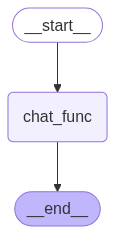

In [25]:
chatbot

In [35]:
thread_id = uuid.uuid4()

while True:

    user_query = input("Enter a message: ")
    print("Human: ", user_query)

    if user_query.strip().lower() in ["bye", "quit", "exit"]:
        print("AI: Goodbye")
        break


    initial_state = {
    'messages': [HumanMessage(content=user_query)]
}
    config = {
        "configurable": {
            "thread_id": str(thread_id),
        }
    }

    response = chatbot.invoke(initial_state, config=config)

    print("AI: ", response["messages"][-1].content)

Human:  HI
AI:  Hello! How can I assist you today?
Human:  My name is Raza
AI:  Nice to meet you, Raza! How can I help you today?
Human:  What is my Name?
AI:  Your name is Raza.
Human:  Add 100 to 100
AI:  100 + 100 equals 200.
Human:  Now add 1000 to it
AI:  Sure! Adding 1000 to 200 equals 1200.
Human:  
AI:  Is there anything else you would like to know or discuss? Feel free to ask!
Human:  My name?
AI:  Your name is Raza.


KeyboardInterrupt: Interrupted by user